In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import pandas as pd
import os, datetime

df = pd.read_csv('climate_hour.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [3]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [4]:
#df['Date Time'] = pd.to_datetime(df['Date Time'])
#df['Date Time'].head()

In [5]:
df.index = df['Date Time']

In [6]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
01.01.2009 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
01.01.2009 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
01.01.2009 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
01.01.2009 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
01.01.2009 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [7]:
df.tail(53)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
29.12.2016 20:00:00,29.12.2016 20:00:00,1012.35,1.41,273.60,-0.23,88.80,6.76,6.01,0.76,3.70,5.93,1281.55,1.64,2.48,231.40
29.12.2016 21:00:00,29.12.2016 21:00:00,1012.46,-0.12,272.08,-0.65,96.20,6.06,5.83,0.23,3.59,5.75,1288.93,1.44,1.76,227.10
29.12.2016 22:00:00,29.12.2016 22:00:00,1012.34,-0.84,271.36,-1.17,97.60,5.74,5.60,0.14,3.45,5.54,1292.32,1.26,2.20,228.10
29.12.2016 23:00:00,29.12.2016 23:00:00,1012.41,-1.15,271.06,-1.42,98.00,5.62,5.50,0.11,3.39,5.44,1293.90,1.59,2.16,216.00
30.12.2016 00:00:00,30.12.2016 00:00:00,1012.35,-1.84,270.37,-2.09,98.20,5.33,5.24,0.10,3.22,5.17,1297.28,2.00,2.60,216.90
30.12.2016 01:00:00,30.12.2016 01:00:00,1012.38,-2.25,269.96,-2.52,98.00,5.18,5.07,0.10,3.12,5.01,1299.35,1.02,1.56,211.30
30.12.2016 02:00:00,30.12.2016 02:00:00,1012.13,-2.75,269.48,-3.02,98.00,4.99,4.89,0.10,3.01,4.83,1301.52,1.91,2.56,223.70
30.12.2016 03:00:00,30.12.2016 03:00:00,1011.91,-3.06,269.19,-3.39,97.50,4.87,4.75,0.12,2.93,4.70,1302.77,1.37,1.84,217.30
30.12.2016 04:00:00,30.12.2016 04:00:00,1011.84,-3.30,268.96,-3.63,97.50,4.79,4.67,0.12,2.87,4.61,1303.89,1.53,2.20,207.80


### EDA

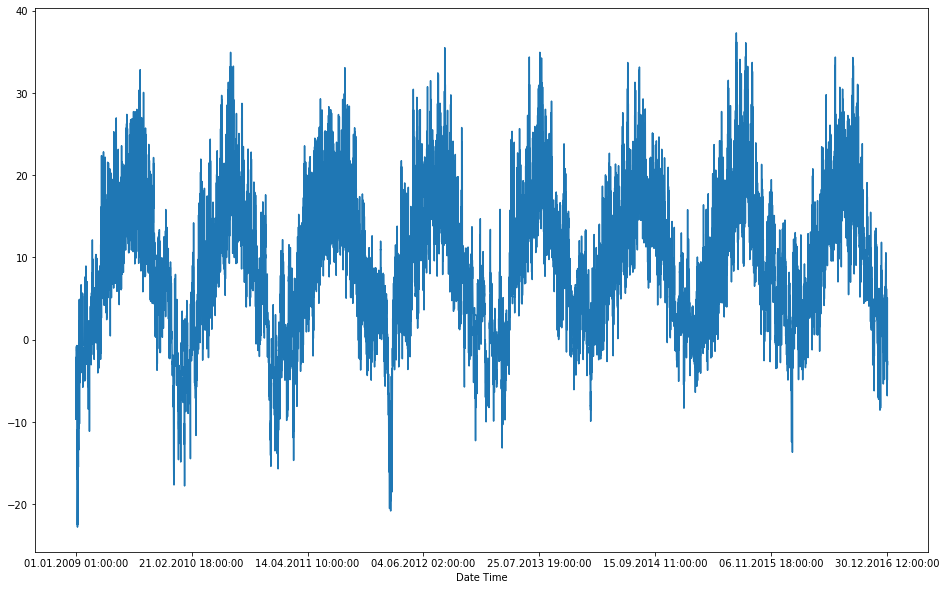

In [8]:
df['T (degC)'].plot(figsize=(16,10))

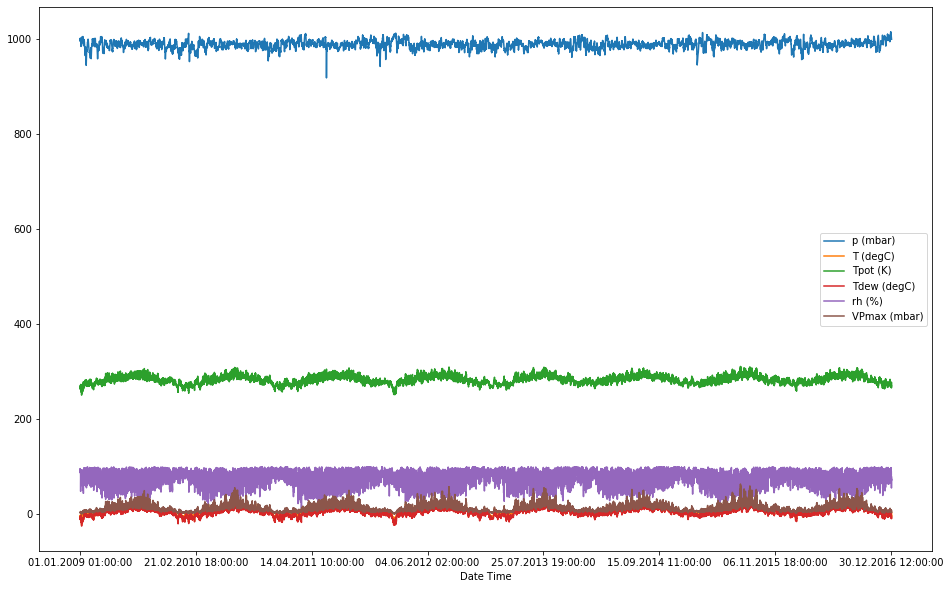

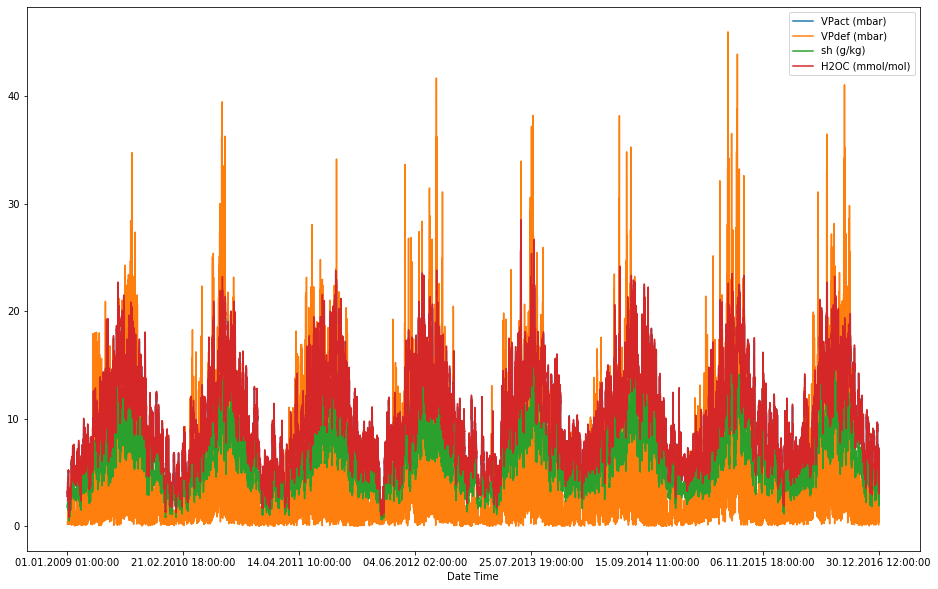

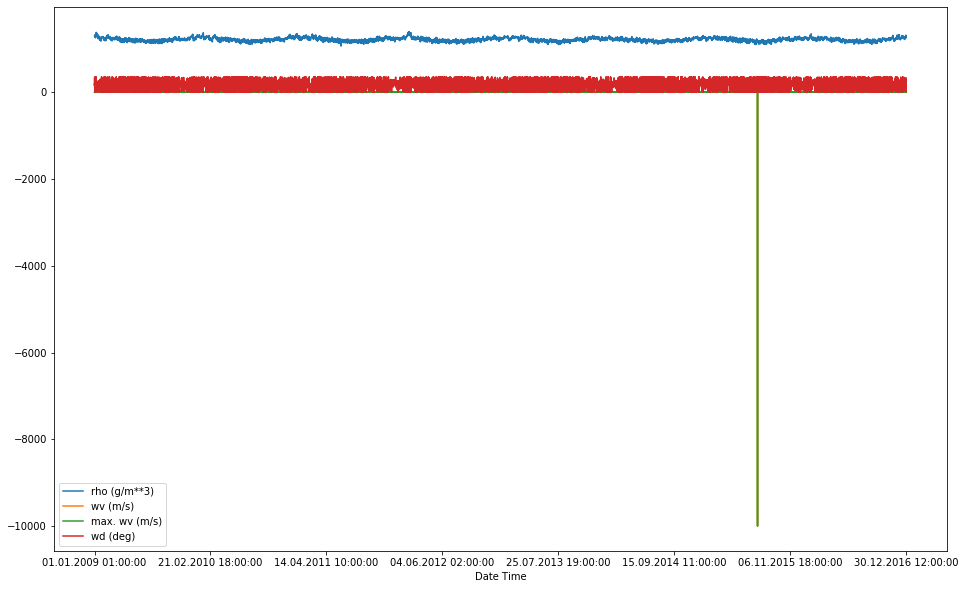

In [9]:
df[['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)']].plot(figsize=(16,10))

df[['VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)']].plot(figsize=(16,10)) 

df[['rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']].plot(figsize=(16,10))

#### We note units needs to be normalized. There are some fauty sensor error in the second variable group

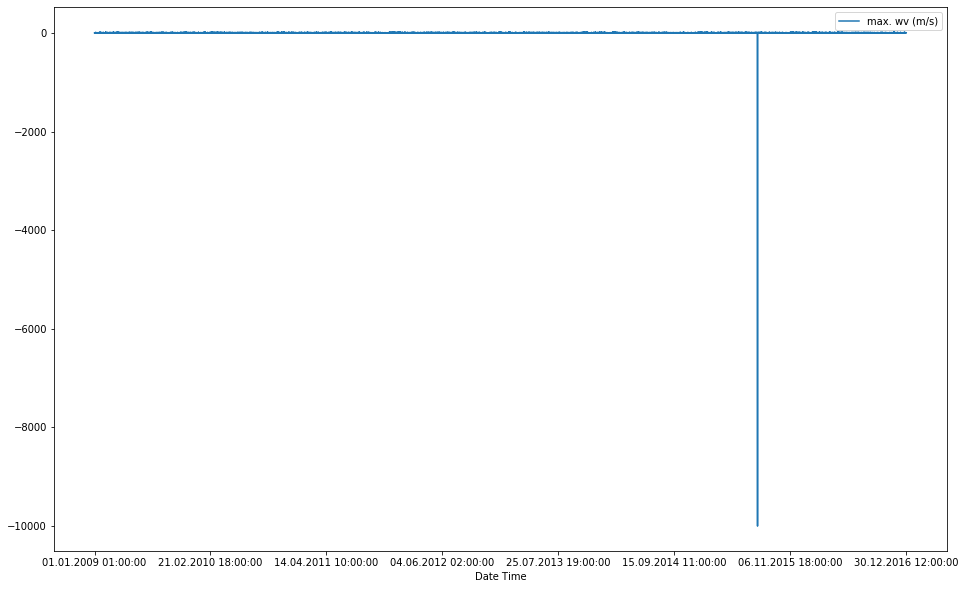

In [10]:
df[['max. wv (m/s)']].plot(figsize=(16,10))

In [11]:
df[['max. wv (m/s)']].min()

max. wv (m/s)   -9999.0
dtype: float64

#### We see below there are some sensor error. This will be imputed later.

In [12]:
df.loc[df[['max. wv (m/s)']][df['max. wv (m/s)'] < -1000].index, 'max. wv (m/s)'] = None

In [13]:
df[['max. wv (m/s)']][df['max. wv (m/s)'] < -1000] 

,max. wv (m/s)
Date Time,


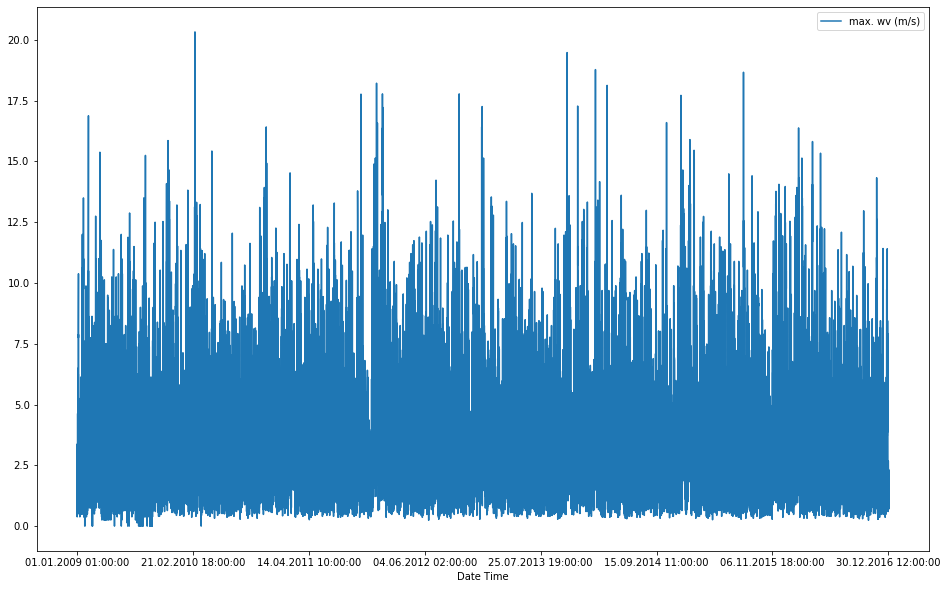

In [14]:
df[['max. wv (m/s)']].plot(figsize=(16,10))

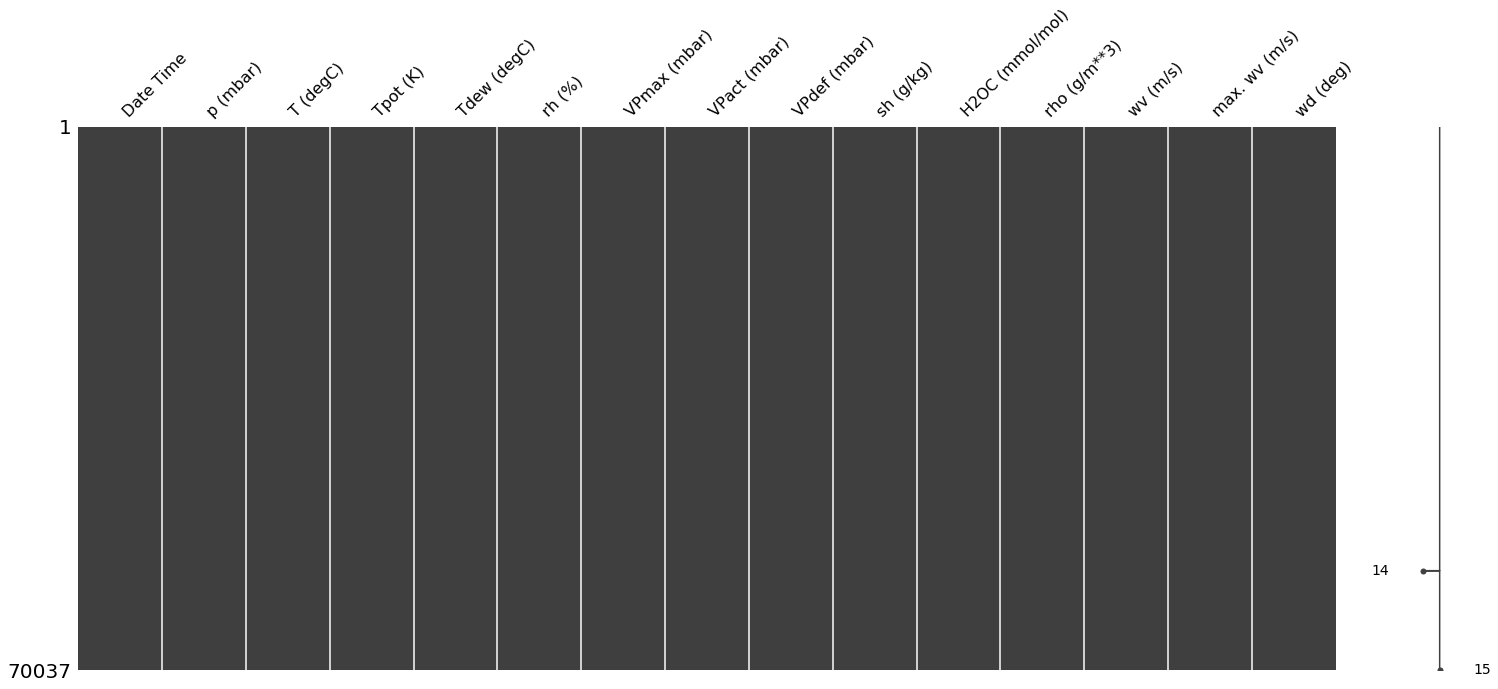

In [15]:
#plot missing variables list
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()

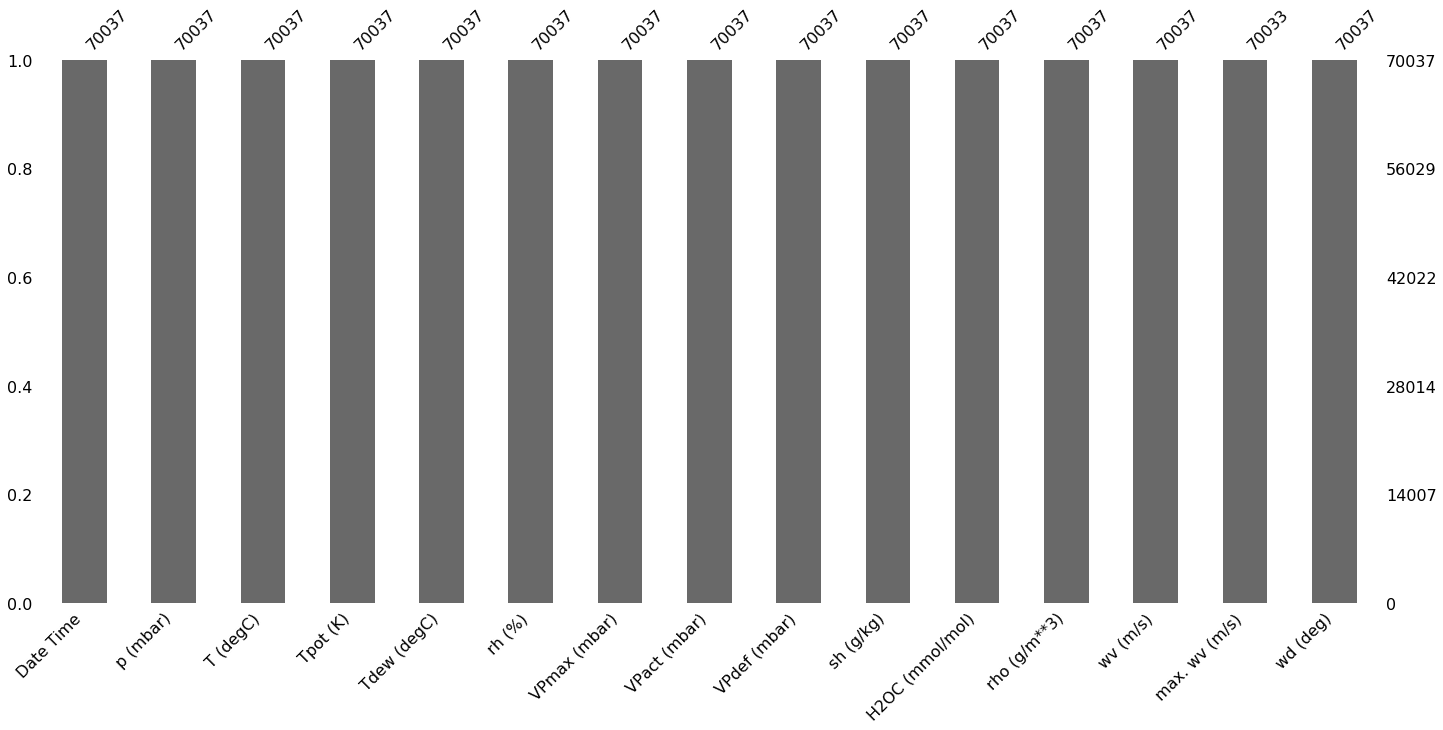

In [16]:
msno.bar(df) 

#### We note earlier 4 error values were dropped. These will be filled with previous valid values to keep continuity of the time series.

In [17]:
df = df.fillna(method='ffill')

#### We check the values have been filled.

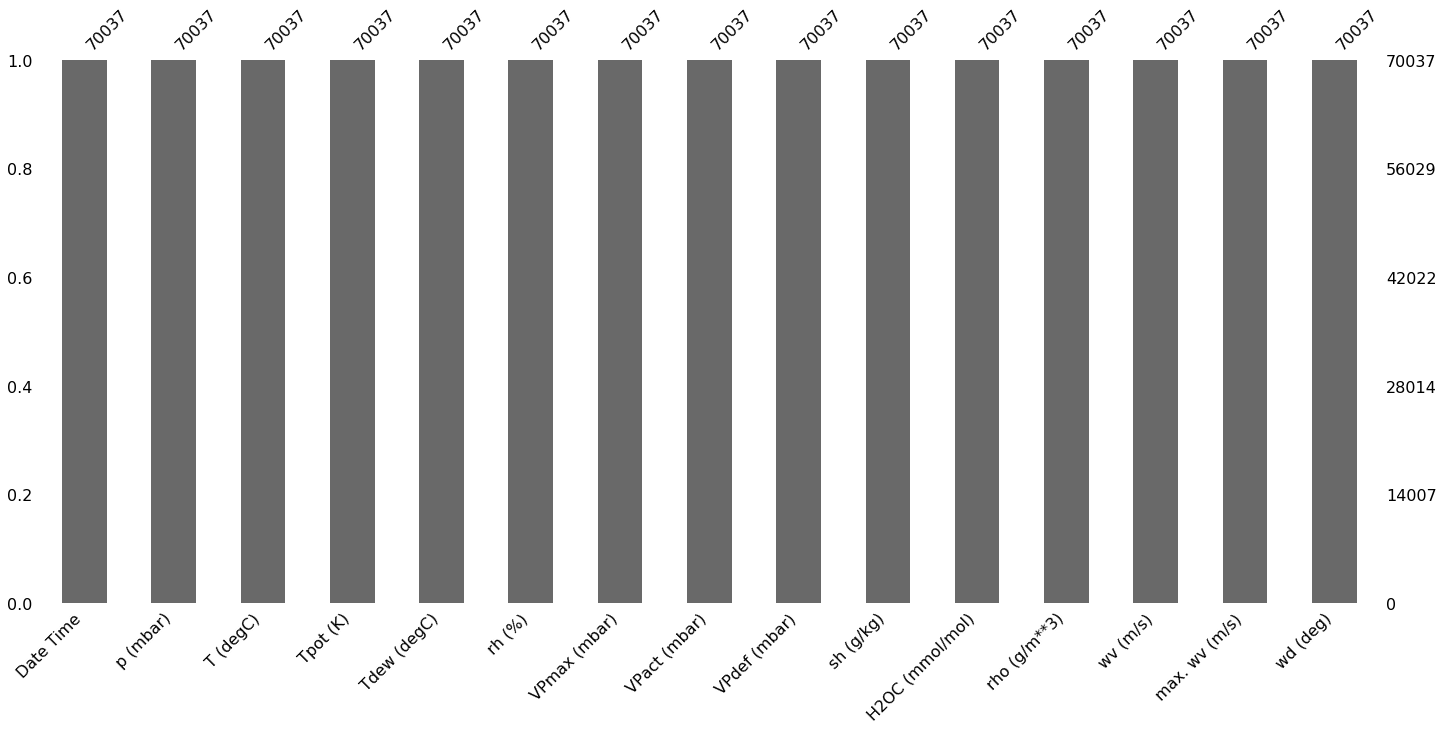

In [18]:
msno.bar(df) 

#### We get the index for train and validation portion of the dataset

In [19]:
#df = df.sort_index()

#### We slice the first 48,000 index as training and validation dataset

In [20]:
train_valid_df = df.iloc[0:48000]

In [21]:
df.iloc[48000:].index.min()

'01.01.2015 00:00:00'

In [22]:
df.iloc[48000:].index.min()

'01.01.2015 00:00:00'

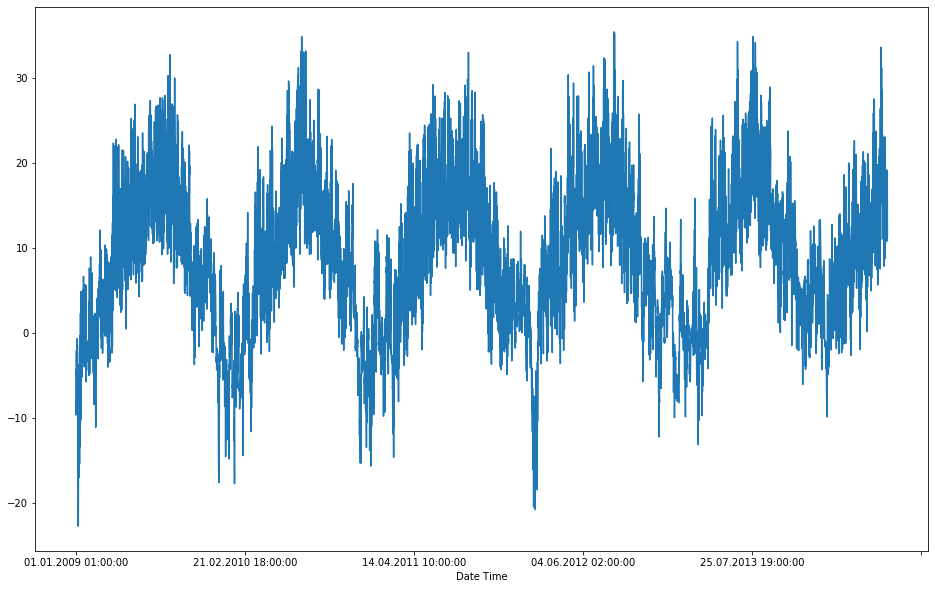

In [23]:
train_valid_df['T (degC)'].plot(figsize=(16,10))

#### We note that there are approximately yearly 6 seasonal cycles in temperture. With this information, we will split the validation set to be 2013 and newer data.

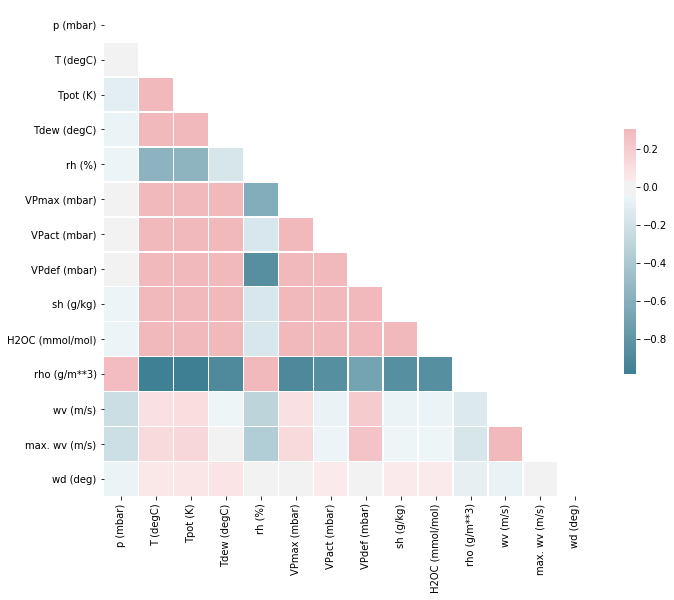

In [25]:
import numpy as np
import seaborn as sns
corr = train_valid_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


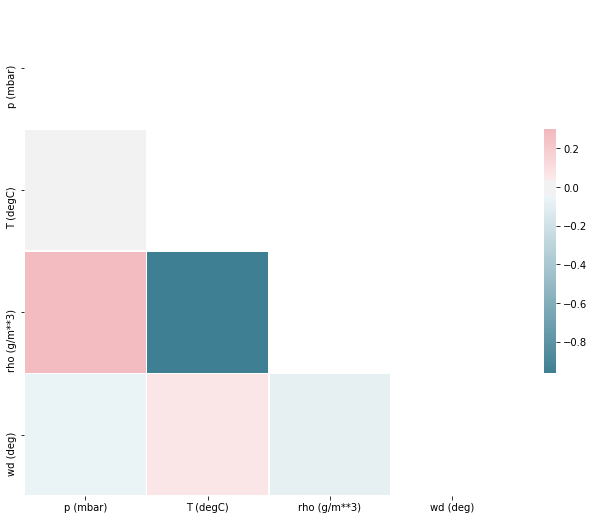

In [26]:
import seaborn as sns
corr = train_valid_df[[ 'p (mbar)', 'T (degC)', 'rho (g/m**3)', 'wd (deg)']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
train_df = train_valid_df.iloc[:int(48000 - 48000/5)]
train_df = train_df[[ 'p (mbar)', 'T (degC)', 'rho (g/m**3)', 'wd (deg)']]
train_df

,p (mbar),T (degC),rho (g/m**3),wd (deg)
Date Time,,,,
01.01.2009 01:00:00,996.50,-8.05,1307.86,192.7
01.01.2009 02:00:00,996.62,-8.88,1312.25,190.3
01.01.2009 03:00:00,996.84,-8.81,1312.18,167.2
01.01.2009 04:00:00,996.99,-9.05,1313.61,240.0
01.01.2009 05:00:00,997.46,-9.63,1317.19,157.0
...,...,...,...,...
19.05.2013 22:00:00,980.02,12.46,1189.04,213.0
19.05.2013 23:00:00,979.93,11.79,1191.90,174.2
20.05.2013 00:00:00,980.34,11.16,1195.32,209.3


In [28]:
valid_df = train_valid_df.iloc[int(48000 - 48000/5):]
valid_df = valid_df[[ 'p (mbar)', 'T (degC)', 'rho (g/m**3)', 'wd (deg)']]
valid_df

,p (mbar),T (degC),rho (g/m**3),wd (deg)
Date Time,,,,
20.05.2013 03:00:00,981.14,10.46,1199.71,181.00
20.05.2013 04:00:00,981.26,10.01,1202.10,201.80
20.05.2013 05:00:00,981.53,9.79,1203.51,206.00
20.05.2013 06:00:00,981.91,10.18,1202.44,195.10
20.05.2013 07:00:00,981.98,10.89,1199.61,203.40
...,...,...,...,...
23.06.2014 22:00:00,992.61,14.87,1195.56,130.90
23.06.2014 23:00:00,992.55,15.09,1194.74,332.20
24.06.2014 00:00:00,992.53,13.05,1203.14,51.79


In [29]:
test_df = df.iloc[48000:]#df.iloc[48000:-53]
test_df = test_df[[ 'p (mbar)', 'T (degC)', 'rho (g/m**3)', 'wd (deg)']]
test_df

,p (mbar),T (degC),rho (g/m**3),wd (deg)
Date Time,,,,
24.06.2014 03:00:00,991.84,11.29,1209.90,276.70
24.06.2014 04:00:00,991.73,9.11,1219.30,227.70
24.06.2014 05:00:00,991.96,9.52,1217.79,207.10
24.06.2014 06:00:00,991.91,11.57,1208.82,143.60
24.06.2014 07:00:00,991.79,13.53,1200.19,136.40
...,...,...,...,...
31.12.2016 20:00:00,1001.47,-1.52,1282.60,232.00
31.12.2016 21:00:00,1001.29,-3.09,1289.78,207.50
31.12.2016 22:00:00,1000.70,-2.59,1286.67,8.15


In [30]:
test_df.iloc[0:48,:]

,p (mbar),T (degC),rho (g/m**3),wd (deg)
Date Time,,,,
24.06.2014 03:00:00,991.84,11.29,1209.90,276.70
24.06.2014 04:00:00,991.73,9.11,1219.30,227.70
24.06.2014 05:00:00,991.96,9.52,1217.79,207.10
24.06.2014 06:00:00,991.91,11.57,1208.82,143.60
24.06.2014 07:00:00,991.79,13.53,1200.19,136.40
24.06.2014 08:00:00,991.77,15.14,1193.14,114.30
24.06.2014 09:00:00,991.55,17.28,1184.12,144.60
24.06.2014 10:00:00,991.25,17.19,1184.08,333.20
24.06.2014 11:00:00,990.96,18.76,1177.36,280.90


In [31]:
test_df.iloc[48:,:].head(6)

,p (mbar),T (degC),rho (g/m**3),wd (deg)
Date Time,,,,
26.06.2014 03:00:00,989.69,10.02,1212.21,299.30
26.06.2014 04:00:00,989.79,9.68,1213.97,307.90
26.06.2014 05:00:00,989.89,9.58,1214.50,10.72
26.06.2014 06:00:00,990.35,10.01,1213.17,228.90
26.06.2014 07:00:00,990.35,11.61,1206.13,50.65
26.06.2014 08:00:00,990.34,12.65,1201.79,133.90


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

n_train_df = scaler.fit_transform(train_df)
print(n_train_df.shape)

n_valid_df = scaler.transform(valid_df)
print(n_valid_df.shape)

n_test_df = scaler.transform(test_df)
print(n_test_df.shape)

(38400, 4)
(9600, 4)
(22037, 4)


In [33]:
import numpy as np

In [34]:
print(np.max(n_train_df))
print(np.min(n_train_df))
print(np.min(n_valid_df))
print(np.max(n_valid_df))

1.0
0.0
0.00025
1.0


#### We note here each row is 1 hour apart. We will create a X 3D tensor with (numRows - (48 + 6)hrs), 48hrs, 4 tensor. Target Tensor Y will be (numRows - 6hrs), 6 hrs, 1 tensor

In [35]:
time_block = 48
prediction = 5
feature_num = n_train_df.shape[1]

train_X_tensor = np.array([])
train_Y_tensor = np.array([])

for i,hour in enumerate(n_train_df[:-(time_block+prediction)]):
    train_X_tensor = np.append(train_X_tensor, n_train_df[i:i+time_block])
    train_Y_tensor = np.append(train_Y_tensor, n_train_df[i+time_block+prediction,1])

In [36]:
int(train_X_tensor.shape[0]/(time_block*feature_num ))

38347

In [37]:
int(train_Y_tensor.shape[0]/(prediction*1 ))

7669

In [38]:
train_X = np.reshape(train_X_tensor, (int(train_X_tensor.shape[0]/(time_block*feature_num )),time_block,feature_num ))
train_Y = np.reshape(train_Y_tensor, (int(train_Y_tensor.shape[0]/(1 )),1,1 ))
#train_Y = np.reshape(train_Y_tensor, (int(train_Y_tensor.shape[0]/(prediction*1 )),prediction))

In [39]:
print(train_X.shape)
print(train_Y.shape)

(38347, 48, 4)
(38347, 1, 1)


In [40]:
valid_X_tensor = np.array([])
valid_Y_tensor = np.array([])

for i,hour in enumerate(n_valid_df[:-(time_block+prediction)]):
    valid_X_tensor = np.append(valid_X_tensor, n_valid_df[i:i+time_block])
    valid_Y_tensor = np.append(valid_Y_tensor, n_valid_df[i+time_block+prediction,1])

In [41]:
valid_X = np.reshape(valid_X_tensor, (int(valid_X_tensor.shape[0]/(time_block*feature_num )),time_block,feature_num ))
valid_Y = np.reshape(valid_Y_tensor, (int(valid_Y_tensor.shape[0]/(1)),1,1 ))
#valid_Y = np.reshape(valid_Y_tensor, (int(valid_Y_tensor.shape[0]/(prediction*1)),prediction ))

In [42]:
print(valid_X.shape)
print(valid_Y.shape)

(9547, 48, 4)
(9547, 1, 1)


In [43]:
test_X_tensor = np.array([])
test_Y_tensor = np.array([])

#for i,hour in enumerate(n_test_df[:-(time_block+prediction)]):
for i,hour in enumerate(n_test_df[0:-53]): #maybe -53
    test_X_tensor = np.append(test_X_tensor, n_test_df[i:i+time_block])
    test_Y_tensor = np.append(test_Y_tensor, n_test_df[i+time_block+prediction,1])

In [44]:
test_X = np.reshape(test_X_tensor, (int(test_X_tensor.shape[0]/(time_block*feature_num )),time_block,feature_num ))
test_Y = np.reshape(test_Y_tensor, (int(test_Y_tensor.shape[0]/(1)),1,1 ))
#test_Y = np.reshape(test_Y_tensor, (int(test_Y_tensor.shape[0]/(prediction*1)),prediction ))

In [45]:
print(test_X.shape)
print(test_Y.shape)

(21984, 48, 4)
(21984, 1, 1)


In [46]:
import pickle

a=(valid_X,valid_Y,test_X,test_Y)
with open('validation_test.pickle', 'wb') as handle:
    pickle.dump(a, handle)

with open('scaler.pickle', 'wb') as handle:
    pickle.dump(scaler, handle)

In [47]:
48000 - (valid_X.shape[0] + train_X.shape[0])

106

In [48]:
108/2

54.0

In [49]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D, Concatenate,Input
import tensorflow.keras.layers as layers

In [50]:
train_X.shape[1:]

(48, 4)

In [51]:
train_Y.shape[2]

1

In [52]:
type(train_X[0][0][0])

numpy.float64

In [53]:
train_X.shape[2]

4

In [54]:
train_Y.shape

(38347, 1, 1)

In [55]:
train_Y.shape[1]

1

#### Model Callback Definitions. We set up early stop to end epoch when training is not making further progress by validation loss value

In [59]:
logdir = os.path.join("./logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
EPOCHS = 5
checkpoint_filepath = './checkpoints/'

tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

earlystop_callback = keras.callbacks.EarlyStopping(monitor="val_loss",
    min_delta=0,
    patience=EPOCHS*2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,)

#### We leverage TensorBoard's support for hyperparameter search to find optimal model and hyperparameters

In [60]:
from tensorboard.plugins.hparams import api as hp

In [61]:
METRIC_ACCURACY = 'mae'

### Parameter definition

#### Structure Parameters

In [62]:
HP_NUM_LSTM_LAYERS = hp.HParam('num_lstm_layers', hp.Discrete([3]))
HP_NUM_DENSE_LAYER = hp.HParam('num_dense_layers', hp.Discrete([1]))
HP_LSTM_NUM_UNITS = hp.HParam('lstm_num_units', hp.Discrete([1,16,32]))
HP_DENSE_NUM_UNITS = hp.HParam('lstm_num_units', hp.Discrete([32]))

#### Hyperparameters

In [63]:
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([.001]))
HP_ACT_FUNC = hp.HParam('act_func', hp.Discrete(["relu,tanh"]))

## Simple LSTM model

In [ ]:
def train_test_model(hparams):
    opt = tf.keras.optimizers.Adamax(learning_rate=hparams[HP_LEARNING_RATE], beta_1=0.9, beta_2=0.999)
    loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

    logdir = os.path.join("./logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_cbk = keras.callbacks.TensorBoard(log_dir=logdir)
    
    rs = False #rs is for return_sequences for LSTM
    if hparams[HP_NUM_LSTM_LAYERS] > 1: rs = True 
    
    model = Sequential()
    model.add(Bidirectional(LSTM(hparams[HP_LSTM_NUM_UNITS], 
                   input_shape= train_X.shape[1:], 
                   activation=hparams[HP_ACT_FUNC],
                   #recurrent_dropout=0.1, 
                   return_sequences=rs)))
    model.add(layers.BatchNormalization())
    
    for layer_no in range(hparams[HP_NUM_LSTM_LAYERS]-1):
        if layer_no != (hparams[HP_NUM_LSTM_LAYERS]-2):
            model.add(Bidirectional(LSTM(hparams[HP_LSTM_NUM_UNITS], 
                                         activation=hparams[HP_ACT_FUNC],
                                         #recurrent_dropout=0.1,
                                         return_sequences = True)))
            model.add(layers.BatchNormalization())
        else:
            model.add(Bidirectional(LSTM(hparams[HP_LSTM_NUM_UNITS], 
                           activation=hparams[HP_ACT_FUNC],
                           #recurrent_dropout=0.1,
                           return_sequences = False)))
            model.add(layers.BatchNormalization())
            print("Skip return sequence")
    
    #fully connected layer
    for num_dense_layer in range(hparams[HP_NUM_DENSE_LAYER]):
        model.add(layers.Dense(hparams[HP_DENSE_NUM_UNITS],
                               activation=hparams[HP_ACT_FUNC],
                               kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),
                               #bias_regularizer=tf.keras.regularizers.l2(1e-4),
                               #activity_regularizer=tf.keras.regularizers.l2(1e-5),
                               ))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.1))
        
    model.add(layers.Dense(train_Y.shape[1]))

    model.compile(optimizer=opt,
              loss=loss,
              metrics=[METRIC_ACCURACY])
    
    modelfilename = checkpoint_filepath + str(run_name)+'_'+\
                    datetime.datetime.now().strftime("%Y%m%d-%H%M%S")\
                    + "_model.hdf5"
    
    print(modelfilename)
    
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(modelfilename,
                                                                    save_weights_only=False,
                                                                    monitor='val_mae', #save the model with best mae
                                                                    mode='min',
                                                                    verbose=1,
                                                                    period = EPOCHS,
                                                                    save_best_only=True)
    
    #print(model.summary())
    hist = model.fit(train_X,train_Y,
                 batch_size=24*7, #we batch a window size that is consistent with the cycle count of weeks
                 epochs=500, 
                 validation_data=(valid_X, valid_Y), 
                 callbacks=[tensorboard_cbk,
                           hp.KerasCallback(logdir, hparams),
                           earlystop_callback,
                           model_checkpoint_callback])
    
    _, accuracy = model.evaluate(valid_X, valid_Y)
    return accuracy, model

def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy, model = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
        return model

In [ ]:
HP_NUM_LSTM_LAYERS = hp.HParam('num_lstm_layers', hp.Discrete([2]))
HP_ACT_FUNC = hp.HParam('act_func', hp.Discrete(["relu","tanh"]))
HP_NUM_DENSE_LAYER = hp.HParam('num_dense_layers', hp.Discrete([2]))
HP_LSTM_NUM_UNITS = hp.HParam('lstm_num_units', hp.Discrete([18])) #18
HP_DENSE_NUM_UNITS = hp.HParam('dense_num_units', hp.Discrete([32])) #32
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([.001]))

session_num = 0

num_lstm_layers = HP_NUM_LSTM_LAYERS.domain.values[0]
act_func = HP_ACT_FUNC.domain.values[0]
num_dense_layers = HP_NUM_DENSE_LAYER.domain.values[0]
lstm_num_units = HP_LSTM_NUM_UNITS.domain.values[0]
dense_num_units = HP_DENSE_NUM_UNITS.domain.values[0]
learning_rate = HP_LEARNING_RATE.domain.values[0]

for num_lstm_layers in HP_NUM_LSTM_LAYERS.domain.values:
    #for num_dense_layers in HP_NUM_DENSE_LAYER.domain.values[1:2]:
        hparams = {
                  HP_NUM_LSTM_LAYERS: num_lstm_layers,
                  HP_ACT_FUNC: act_func,
                  HP_NUM_DENSE_LAYER: num_dense_layers,
                  HP_LSTM_NUM_UNITS: lstm_num_units,
                  HP_DENSE_NUM_UNITS: dense_num_units,
                  HP_LEARNING_RATE: learning_rate,
                  #HP_EPOCH: epoch,
                  #HP_DROPOUT: dropout_rate,
                  #HP_ACTIVATION: activation,
                  }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        model = run('logs/hparam_tuning/' + run_name, hparams)
        session_num += 1

In [68]:
from tensorflow.keras.layers import *

## CNN LSTM

#### Adding a CNN layer on the time dimension of the LSTM. 1D CNN is applied to the time dimension to capture seasonal invariant of days, weeks, and years. ### Alternatively, this maybe done in Keras' functional API with each of the structure of convoluted filter in parallel fed into LSTM.

In [ ]:
def train_test_cnn_model(hparams):
    opt = tf.keras.optimizers.Adamax(learning_rate=hparams[HP_LEARNING_RATE], beta_1=0.9, beta_2=0.999)
    loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

    logdir = os.path.join("./logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_cbk = keras.callbacks.TensorBoard(log_dir=logdir)
    
    rs = False
    if hparams[HP_NUM_LSTM_LAYERS] > 1: rs = True
    model = Sequential()
    model.add(Conv1D(filters=32, 
                     kernel_size=24, 
                     activation='relu'
                    ,input_shape=train_X.shape[1:],))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    #model.add(Conv1D(filters=32, kernel_size=365, activation='relu'))
    #model.add(MaxPooling1D(pool_size=2))
    
    model.add(Bidirectional(LSTM(hparams[HP_LSTM_NUM_UNITS], 
                   input_shape= train_X.shape[1:], 
                   activation=hparams[HP_ACT_FUNC],
                   #recurrent_dropout=0.1, 
                   return_sequences=rs)))
    model.add(layers.BatchNormalization())
    
    for layer_no in range(hparams[HP_NUM_LSTM_LAYERS]-1):
        if layer_no != (hparams[HP_NUM_LSTM_LAYERS]-2):
            model.add(Bidirectional(LSTM(hparams[HP_LSTM_NUM_UNITS], 
                                         activation=hparams[HP_ACT_FUNC],
                                         #recurrent_dropout=0.1,
                                         return_sequences = True)))
            model.add(layers.BatchNormalization())
        else:
            model.add(Bidirectional(LSTM(hparams[HP_LSTM_NUM_UNITS], 
                           activation=hparams[HP_ACT_FUNC],
                           #recurrent_dropout=0.1,
                           return_sequences = False)))
            model.add(layers.BatchNormalization())
            print("Skip return sequence")
    
    for num_dense_layer in range(hparams[HP_NUM_DENSE_LAYER]):
        model.add(layers.Dense(hparams[HP_DENSE_NUM_UNITS],
                               activation=hparams[HP_ACT_FUNC],
                               kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),
                               #bias_regularizer=tf.keras.regularizers.l2(1e-4),
                               #activity_regularizer=tf.keras.regularizers.l2(1e-5),
                               ))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.1))
        
    model.add(layers.Dense(train_Y.shape[1]))

    model.compile(optimizer=opt,
              loss=loss,
              metrics=[METRIC_ACCURACY])

    
    modelfilename = checkpoint_filepath + str(run_name)+'_'+\
                    datetime.datetime.now().strftime("%Y%m%d-%H%M%S")\
                    + "_model.hdf5"
    
    print(modelfilename)
    
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    modelfilename,
    save_weights_only=False,
    monitor='val_mae',
    mode='min',
    verbose=1,
    period = 1,
    save_best_only=True)
    
    print(model.summary())
    hist = model.fit(train_X,train_Y,
                 batch_size=24*7,
                 epochs=500, 
                 validation_data=(valid_X, valid_Y), 
                 callbacks=[tensorboard_cbk,
                           hp.KerasCallback(logdir, hparams),
                           earlystop_callback,
                           model_checkpoint_callback])
    
    _, accuracy = model.evaluate(valid_X, valid_Y)
    return accuracy, model

def run_cnn(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy, model = train_test_cnn_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
        return model

In [ ]:
HP_NUM_LSTM_LAYERS = hp.HParam('num_lstm_layers', hp.Discrete([2]))
HP_ACT_FUNC = hp.HParam('act_func', hp.Discrete(["relu","tanh"]))
HP_NUM_DENSE_LAYER = hp.HParam('num_dense_layers', hp.Discrete([2]))
HP_LSTM_NUM_UNITS = hp.HParam('lstm_num_units', hp.Discrete([18])) #18
HP_DENSE_NUM_UNITS = hp.HParam('dense_num_units', hp.Discrete([32])) #32
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([.001]))

session_num = 0

num_lstm_layers = HP_NUM_LSTM_LAYERS.domain.values[0]
act_func = HP_ACT_FUNC.domain.values[0]
num_dense_layers = HP_NUM_DENSE_LAYER.domain.values[0]
lstm_num_units = HP_LSTM_NUM_UNITS.domain.values[0]
dense_num_units = HP_DENSE_NUM_UNITS.domain.values[0]
learning_rate = HP_LEARNING_RATE.domain.values[0]

for num_lstm_layers in HP_NUM_LSTM_LAYERS.domain.values:
    #for num_dense_layers in HP_NUM_DENSE_LAYER.domain.values[1:2]:
        hparams = {
                  HP_NUM_LSTM_LAYERS: num_lstm_layers,
                  HP_ACT_FUNC: act_func,
                  HP_NUM_DENSE_LAYER: num_dense_layers,
                  HP_LSTM_NUM_UNITS: lstm_num_units,
                  HP_DENSE_NUM_UNITS: dense_num_units,
                  HP_LEARNING_RATE: learning_rate,
                  #HP_EPOCH: epoch,
                  #HP_DROPOUT: dropout_rate,
                  #HP_ACTIVATION: activation,
                  }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        model = run_cnn('logs/hparam_tuning/' + run_name, hparams)
        session_num += 1

##### for loading checkpoint model as full model save

In [ ]:
#load checkpoint model
#model = tf.keras.models.load_model(checkpoint_filepath + "run-0_20200531-141520_model.hdf5")
#model.summary()

In [ ]:
valid_loss, valid_acc = model.evaluate(valid_X, valid_Y, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy_MAE=%s, valid_loss=%s" % (valid_acc, valid_loss))

#### At this point a different approach of exploring the model is used. While Hyperparameter integration with TensorBoard is a great feature, it is lacking swiftness when introducing new model structure. Variation of the model will have to be defined and new hyperparameter dictionary will need to be defined as well. In favorite for rapid model structure adjustment  and exploration, a simple TensorFlow model is defined in the global scope.

## Top half of AutoEncoder LSTM Model with > shaped LSTM layers

In [66]:
import tensorflow.keras as keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, GaussianNoise
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Concatenate, Input, LSTM, RepeatVector, TimeDistributed
import tensorflow.keras.layers as layers

#### Benchmark model 3 layer LSTM with 2 dense layers

In [71]:
loss='mae'

In [ ]:
serie_size, n_features = train_X.shape[1:]

epochs = 100
batch = 48
lr = 0.001

lstm_model = Sequential()
lstm_model.add(LSTM(10, input_shape=(serie_size, n_features), return_sequences=True))
lstm_model.add(LSTM(6, activation='relu', return_sequences=True))
lstm_model.add(LSTM(1, activation='relu'))
lstm_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(Dense(train_Y.shape[1]))
lstm_model.summary()

adam = optimizers.Adam(lr)
lstm_model.compile(loss=loss,
                   metrics=[METRIC_ACCURACY], 
                   optimizer=adam)

In [ ]:
modelfilename = checkpoint_filepath + '_'+\
                    datetime.datetime.now().strftime("%Y%m%d-%H%M%S")\
                    + "_model.hdf5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    modelfilename,
    save_weights_only=False,
    monitor='val_mae',
    mode='min',
    verbose=1,
    period = 1,
    save_best_only=True)

logdir = os.path.join("./logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir=logdir)

lstm_history = lstm_model.fit(train_X,train_Y, 
                             validation_data=(valid_X, valid_Y),
                             epochs=epochs, 
                             batch_size=batch, 
                             callbacks=[tensorboard_cbk,
                             hp.KerasCallback(logdir, hparams),
                             earlystop_callback,
                             model_checkpoint_callback])


#### Validation Loss

In [ ]:
valid_loss, valid_acc = lstm_model.evaluate(valid_X, valid_Y, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy_MAE=%s, valid_loss=%s" % (valid_acc, valid_loss))

# With Autoencoder LSTM

In [72]:
serie_size, n_features = train_X.shape[1:]

epochs = 100
batch = 48 * 7
lr = 0.001

encoder_decoder = Sequential()
encoder_decoder.add(LSTM(10, input_shape=(serie_size, n_features), return_sequences=True))
encoder_decoder.add(LSTM(6, activation='relu', return_sequences=True))
encoder_decoder.add(LSTM(1, activation='relu'))
encoder_decoder.add(RepeatVector(serie_size))
encoder_decoder.add(LSTM(serie_size, activation='relu', return_sequences=True))
encoder_decoder.add(LSTM(6, activation='relu', return_sequences=True))
#encoder_decoder.add(LSTM(1, activation='relu'))
#encoder_decoder.add(Dense(train_Y.shape[1]))
encoder_decoder.add(TimeDistributed(Dense(train_Y.shape[1])))
encoder_decoder.add(Flatten())
encoder_decoder.add(Dense(train_Y.shape[1]))
encoder_decoder.summary()

adam = optimizers.Adam(lr)
encoder_decoder.compile(loss=loss,
                   metrics=[METRIC_ACCURACY], 
                   optimizer=adam)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 48, 10)            600       
_________________________________________________________________
lstm_18 (LSTM)               (None, 48, 6)             408       
_________________________________________________________________
lstm_19 (LSTM)               (None, 1)                 32        
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 48, 1)             0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 48, 48)            9600      
_________________________________________________________________
lstm_21 (LSTM)               (None, 48, 6)             1320      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 48, 1)            

In [ ]:
logdir = os.path.join("./logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir=logdir)

modelfilename = checkpoint_filepath + '_'+\
                    datetime.datetime.now().strftime("%Y%m%d-%H%M%S")\
                    + "_model.hdf5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    modelfilename,
    save_weights_only=False,
    monitor='val_mae',#'val_accuracy',
    mode='min',
    verbose=1,
    period = EPOCHS,
    save_best_only=True)

encoder_decoder_history = encoder_decoder.fit(train_X,train_Y, 
                             validation_data=(valid_X, valid_Y),
                             epochs=100, 
                             batch_size=batch, 
                             callbacks=[tensorboard_cbk,
                             hp.KerasCallback(logdir, hparams),
                             earlystop_callback,
                             model_checkpoint_callback])

In [ ]:
valid_loss, valid_acc = encoder_decoder.evaluate(valid_X, valid_Y, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy_MAE=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [ ]:
checkpoint_filepath = './checkpoints/'
#load checkpoint model
model_filename = ['_20200604-141234_model.hdf5']
model2 = tf.keras.models.load_model(checkpoint_filepath + model_filename[0])
model2.summary()

## Refined Encoder Decoder LSTM model with the last LSTM 6 unit layer removed and SGD.

In [73]:
from tensorflow.keras import initializers

In [112]:
serie_size, n_features = train_X.shape[1:]

epochs = 100
batch = 48*7
lr = 0.001

encoder_decoder2 = Sequential()
encoder_decoder2.add(LSTM(20, input_shape=(serie_size, n_features),
                           #kernel_initializer=initializers.RandomNormal(stddev=0.01),
                           #bias_initializer=initializers.Zeros(), 
                           return_sequences=True))

#encoder_decoder2.add(GaussianNoise(0.00))
encoder_decoder2.add(LSTM(12, activation='relu',
                           #kernel_initializer=initializers.RandomNormal(stddev=0.01),
                           #bias_initializer=initializers.Zeros(), 
                          return_sequences=True))

#encoder_decoder2.add(GaussianNoise(0.00))
encoder_decoder2.add(LSTM(2, activation='relu',))
                         #kernel_initializer=initializers.RandomNormal(stddev=0.01),
                         #bias_initializer=initializers.Zeros()))
#encoder_decoder2.add(GaussianNoise(0.001))
#encoder_decoder2.add(Dropout(0.1))
encoder_decoder2.add(RepeatVector(serie_size))
encoder_decoder2.add(LSTM(serie_size, activation='relu',
                          #kernel_initializer=initializers.RandomNormal(stddev=0.01),
                          #bias_initializer=initializers.Zeros(), 
                          return_sequences=True))
#encoder_decoder2.add(LSTM(6, activation='relu', return_sequences=True)) #6
#encoder_decoder2.add(LSTM(1, activation='relu'))
#encoder_decoder2.add(Dense(train_Y.shape[1]))
encoder_decoder2.add(TimeDistributed(Dense(train_Y.shape[1],)))
                                     #kernel_initializer=initializers.
                                     #RandomNormal(stddev=0.01),
                                     #bias_initializer=initializers.Zeros())))
encoder_decoder2.add(Dropout(.1))         
encoder_decoder2.add(Flatten())
encoder_decoder2.add(Dense(train_Y.shape[1],))
                           #kernel_initializer=initializers.RandomNormal(stddev=0.01),
                           #bias_initializer=initializers.Zeros()))

adam = optimizers.Adam(lr)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=1000,
    decay_rate=0.9)
sgd = keras.optimizers.SGD(learning_rate=lr_schedule)

encoder_decoder2.compile(loss=loss,
                   metrics=[METRIC_ACCURACY], 
                   optimizer=adam)
encoder_decoder2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 48, 20)            2000      
_________________________________________________________________
lstm_67 (LSTM)               (None, 48, 12)            1584      
_________________________________________________________________
lstm_68 (LSTM)               (None, 2)                 120       
_________________________________________________________________
repeat_vector_15 (RepeatVect (None, 48, 2)             0         
_________________________________________________________________
lstm_69 (LSTM)               (None, 48, 48)            9792      
_________________________________________________________________
time_distributed_15 (TimeDis (None, 48, 1)             49        
_________________________________________________________________
dropout (Dropout)            (None, 48, 1)           

In [109]:
import tensorflow as tf

In [113]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
    min_delta=0,
    patience=EPOCHS*10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,)

logdir = os.path.join("./logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir=logdir)

modelfilename = checkpoint_filepath + '_'+\
                    datetime.datetime.now().strftime("%Y%m%d-%H%M%S")\
                    + "_model.hdf5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    modelfilename,
    save_weights_only=False,
    monitor='val_mae',#'val_accuracy',
    mode='min',
    verbose=1,
    period = 1,
    save_best_only=True)



encoder_decoder_history = encoder_decoder2.fit(train_X,train_Y, 
                             validation_data=(valid_X, valid_Y),
                             epochs=500, 
                             batch_size=batch, 
                             callbacks=[tensorboard_cbk,
                             #hp.KerasCallback(logdir, hparams),
                             earlystop_callback,
                             model_checkpoint_callback])



Train on 38347 samples, validate on 9547 samples
Epoch 1/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.1348 - mae: 0.1348
Epoch 00001: val_mae improved from inf to 0.05337, saving model to ./checkpoints/_20200605-153441_model.hdf5
38347/38347 [==============================] - 13s 332us/sample - loss: 0.1348 - mae: 0.1348 - val_loss: 0.0534 - val_mae: 0.0534
Epoch 2/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0719 - mae: 0.0719
Epoch 00002: val_mae did not improve from 0.05337
38347/38347 [==============================] - 10s 256us/sample - loss: 0.0719 - mae: 0.0719 - val_loss: 0.0638 - val_mae: 0.0638
Epoch 3/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0652 - mae: 0.0652
Epoch 00003: val_mae did not improve from 0.05337
38347/38347 [==============================] - 10s 261us/sample - loss: 0.0652 - mae: 0.0652 - val_loss: 0.0636 - val_mae: 0.0636
Epoch 4/500
38304/38347 [============================>.] - ETA: 

Epoch 28/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0335 - mae: 0.0335
Epoch 00028: val_mae did not improve from 0.03308
38347/38347 [==============================] - 10s 259us/sample - loss: 0.0335 - mae: 0.0335 - val_loss: 0.0337 - val_mae: 0.0337
Epoch 29/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0337 - mae: 0.0337
Epoch 00029: val_mae did not improve from 0.03308
38347/38347 [==============================] - 10s 258us/sample - loss: 0.0337 - mae: 0.0337 - val_loss: 0.0349 - val_mae: 0.0349
Epoch 30/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0328 - mae: 0.0328
Epoch 00030: val_mae did not improve from 0.03308
38347/38347 [==============================] - 10s 260us/sample - loss: 0.0328 - mae: 0.0328 - val_loss: 0.0361 - val_mae: 0.0361
Epoch 31/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0338 - mae: 0.0338
Epoch 00031: val_mae did not improve from 0.03308
38347/38347 [=========

Epoch 56/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0305 - mae: 0.0305
Epoch 00056: val_mae did not improve from 0.03081
38347/38347 [==============================] - 10s 263us/sample - loss: 0.0305 - mae: 0.0305 - val_loss: 0.0336 - val_mae: 0.0336
Epoch 57/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0302 - mae: 0.0302
Epoch 00057: val_mae improved from 0.03081 to 0.03036, saving model to ./checkpoints/_20200605-153441_model.hdf5
38347/38347 [==============================] - 10s 263us/sample - loss: 0.0302 - mae: 0.0302 - val_loss: 0.0304 - val_mae: 0.0304
Epoch 58/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0301 - mae: 0.0301
Epoch 00058: val_mae improved from 0.03036 to 0.03004, saving model to ./checkpoints/_20200605-153441_model.hdf5
38347/38347 [==============================] - 10s 258us/sample - loss: 0.0301 - mae: 0.0301 - val_loss: 0.0300 - val_mae: 0.0300
Epoch 59/500
38304/38347 [=================

Epoch 84/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0279 - mae: 0.0279
Epoch 00084: val_mae improved from 0.02773 to 0.02748, saving model to ./checkpoints/_20200605-153441_model.hdf5
38347/38347 [==============================] - 10s 259us/sample - loss: 0.0279 - mae: 0.0279 - val_loss: 0.0275 - val_mae: 0.0275
Epoch 85/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0278 - mae: 0.0278
Epoch 00085: val_mae did not improve from 0.02748
38347/38347 [==============================] - 10s 256us/sample - loss: 0.0278 - mae: 0.0278 - val_loss: 0.0289 - val_mae: 0.0289
Epoch 86/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0282 - mae: 0.0282
Epoch 00086: val_mae did not improve from 0.02748
38347/38347 [==============================] - 10s 262us/sample - loss: 0.0282 - mae: 0.0282 - val_loss: 0.0336 - val_mae: 0.0336
Epoch 87/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0278 - mae: 0.0278
Epoch 000

Epoch 112/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0270 - mae: 0.0270
Epoch 00112: val_mae did not improve from 0.02704
38347/38347 [==============================] - 10s 263us/sample - loss: 0.0271 - mae: 0.0271 - val_loss: 0.0301 - val_mae: 0.0301
Epoch 113/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0270 - mae: 0.0270
Epoch 00113: val_mae did not improve from 0.02704
38347/38347 [==============================] - 10s 261us/sample - loss: 0.0270 - mae: 0.0270 - val_loss: 0.0274 - val_mae: 0.0274
Epoch 114/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0268 - mae: 0.0268
Epoch 00114: val_mae did not improve from 0.02704
38347/38347 [==============================] - 10s 261us/sample - loss: 0.0268 - mae: 0.0268 - val_loss: 0.0272 - val_mae: 0.0272
Epoch 115/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0270 - mae: 0.0270
Epoch 00115: val_mae did not improve from 0.02704
38347/38347 [=====

Epoch 141/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0264 - mae: 0.0264
Epoch 00141: val_mae did not improve from 0.02673
38347/38347 [==============================] - 10s 256us/sample - loss: 0.0264 - mae: 0.0264 - val_loss: 0.0273 - val_mae: 0.0273
Epoch 142/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0263 - mae: 0.0263
Epoch 00142: val_mae did not improve from 0.02673
38347/38347 [==============================] - 10s 265us/sample - loss: 0.0263 - mae: 0.0263 - val_loss: 0.0281 - val_mae: 0.0281
Epoch 143/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0262 - mae: 0.0262
Epoch 00143: val_mae did not improve from 0.02673
38347/38347 [==============================] - 10s 263us/sample - loss: 0.0262 - mae: 0.0262 - val_loss: 0.0281 - val_mae: 0.0281
Epoch 144/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0264 - mae: 0.0264
Epoch 00144: val_mae did not improve from 0.02673
38347/38347 [=====

38304/38347 [============================>.] - ETA: 0s - loss: 0.0258 - mae: 0.0258
Epoch 00170: val_mae did not improve from 0.02634
38347/38347 [==============================] - 10s 268us/sample - loss: 0.0258 - mae: 0.0258 - val_loss: 0.0268 - val_mae: 0.0268
Epoch 171/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0256 - mae: 0.0256
Epoch 00171: val_mae did not improve from 0.02634
38347/38347 [==============================] - 10s 263us/sample - loss: 0.0256 - mae: 0.0256 - val_loss: 0.0264 - val_mae: 0.0264
Epoch 172/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0257 - mae: 0.0257
Epoch 00172: val_mae did not improve from 0.02634
38347/38347 [==============================] - 10s 257us/sample - loss: 0.0257 - mae: 0.0257 - val_loss: 0.0266 - val_mae: 0.0266
Epoch 173/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0258 - mae: 0.0258
Epoch 00173: val_mae did not improve from 0.02634
38347/38347 [===================

38304/38347 [============================>.] - ETA: 0s - loss: 0.0256 - mae: 0.0256
Epoch 00199: val_mae did not improve from 0.02605
38347/38347 [==============================] - 10s 266us/sample - loss: 0.0256 - mae: 0.0256 - val_loss: 0.0278 - val_mae: 0.0278
Epoch 200/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0255 - mae: 0.0255
Epoch 00200: val_mae did not improve from 0.02605
38347/38347 [==============================] - 10s 258us/sample - loss: 0.0255 - mae: 0.0255 - val_loss: 0.0263 - val_mae: 0.0263
Epoch 201/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0255 - mae: 0.0255
Epoch 00201: val_mae did not improve from 0.02605
38347/38347 [==============================] - 10s 260us/sample - loss: 0.0255 - mae: 0.0255 - val_loss: 0.0265 - val_mae: 0.0265
Epoch 202/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0254 - mae: 0.0254
Epoch 00202: val_mae did not improve from 0.02605
38347/38347 [===================

38304/38347 [============================>.] - ETA: 0s - loss: 0.0251 - mae: 0.0251
Epoch 00228: val_mae did not improve from 0.02584
38347/38347 [==============================] - 10s 261us/sample - loss: 0.0251 - mae: 0.0251 - val_loss: 0.0264 - val_mae: 0.0264
Epoch 229/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0250 - mae: 0.0250
Epoch 00229: val_mae did not improve from 0.02584
38347/38347 [==============================] - 10s 255us/sample - loss: 0.0250 - mae: 0.0250 - val_loss: 0.0275 - val_mae: 0.0275
Epoch 230/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0253 - mae: 0.0253
Epoch 00230: val_mae did not improve from 0.02584
38347/38347 [==============================] - 10s 260us/sample - loss: 0.0253 - mae: 0.0253 - val_loss: 0.0270 - val_mae: 0.0270
Epoch 231/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0250 - mae: 0.0250
Epoch 00231: val_mae did not improve from 0.02584
38347/38347 [===================

Epoch 257/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0248 - mae: 0.0248
Epoch 00257: val_mae did not improve from 0.02568
38347/38347 [==============================] - 10s 255us/sample - loss: 0.0248 - mae: 0.0248 - val_loss: 0.0267 - val_mae: 0.0267
Epoch 258/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0250 - mae: 0.0250
Epoch 00258: val_mae did not improve from 0.02568
38347/38347 [==============================] - 10s 257us/sample - loss: 0.0250 - mae: 0.0250 - val_loss: 0.0259 - val_mae: 0.0259
Epoch 259/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0249 - mae: 0.0249
Epoch 00259: val_mae did not improve from 0.02568
38347/38347 [==============================] - 10s 258us/sample - loss: 0.0249 - mae: 0.0249 - val_loss: 0.0260 - val_mae: 0.0260
Epoch 260/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0248 - mae: 0.0248
Epoch 00260: val_mae did not improve from 0.02568
38347/38347 [=====

Epoch 287/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0246 - mae: 0.0246
Epoch 00287: val_mae did not improve from 0.02568
38347/38347 [==============================] - 10s 258us/sample - loss: 0.0246 - mae: 0.0246 - val_loss: 0.0263 - val_mae: 0.0263
Epoch 288/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0246 - mae: 0.0246
Epoch 00288: val_mae did not improve from 0.02568
38347/38347 [==============================] - 10s 254us/sample - loss: 0.0246 - mae: 0.0246 - val_loss: 0.0258 - val_mae: 0.0258
Epoch 289/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0246 - mae: 0.0246
Epoch 00289: val_mae did not improve from 0.02568
38347/38347 [==============================] - 10s 258us/sample - loss: 0.0246 - mae: 0.0246 - val_loss: 0.0262 - val_mae: 0.0262
Epoch 290/500
38304/38347 [============================>.] - ETA: 0s - loss: 0.0246 - mae: 0.0246
Epoch 00290: val_mae did not improve from 0.02568
38347/38347 [=====

#### The following screenshot is taken from TensorBoard.
#### ![density map](./TensorBoard Plots/LSTM vs AutoEncoder LSTM.png)

In [ ]:
![alt text]('./TensorBoard Plots/LSTM vs AutoEncoder LSTM.png' "AutoEncoderLSTM vs Simple LSTM")

# Test Set Evaluation

In [ ]:
test_X.shape

In [ ]:
pred = model.predict(test_X)
pred.shape

In [ ]:
flat = pred.flatten()

In [ ]:
padding = np.zeros((flat.shape[0],4))

In [ ]:
for i,row in enumerate(padding):
    padding[i,1] = flat[i]

In [ ]:
padding.shape

In [ ]:
def padding(data, nopad):
    flat = data.flatten()
    padding = np.zeros((flat.shape[0],nopad))
    for i,row in enumerate(padding):
        padding[i,1] = flat[i]
    print(padding.shape)
    data_out = scaler.inverse_transform(padding)
    return np.reshape(data_out, (int(data_out.shape[0]/data.shape[1]),data.shape[1],nopad))
    

In [ ]:
padded = padding(pred, 4)

In [ ]:
padded[0:10]

In [ ]:
padded.shape

In [ ]:
df = pd.read_csv('climate_hour.csv')
get_index = df.iloc[-21984:]['Date Time'].values

In [ ]:
str_index = [index.replace(' ','_') for index in get_index]

In [ ]:
result_df = pd.DataFrame(padded[:,0,1], columns=['temperature'], index=str_index)
result_df.plot(figsize=(16,12))

In [ ]:
result_df.index = result_df.index.rename('date_time')
result_df

In [ ]:
df.columns

In [ ]:
diff = result_df['temperature'].values - df.iloc[-21984:]['T (degC)'].values

In [ ]:
np.average(np.abs(diff))

In [ ]:
result_df.to_csv('results.csv')